<!-- <img src= "" alt ="Titanic" style='width: 100%; height: 1000px'> -->
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Porters_Pass_with_Big_Ben_Range%2C_Torlesse_Range%2C_New_Zealand.jpg/1200px-Porters_Pass_with_Big_Ben_Range%2C_Torlesse_Range%2C_New_Zealand.jpg" alt="Porters Pass" style='width: 100%;'> 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        continue
#         print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Loading the CSV file

In [2]:
landmark_id_df = pd.read_csv("../input/google-landmark-dataset-v2-mini/gldv2_mini/gldv2_mini.csv")

In [3]:
landmark_id_df.head()

filename  landmark_id
0  f82497d5fc4414b4.jpg       194047
1  f54d302bc78558f3.jpg       194047
2  ec71fddef8027e43.jpg       194047
3  ec571b60274d3b53.jpg       194047
4  ea2daf404a271616.jpg       194047

# Data Visualization:
* Histogram of Count of Landmark ID
* Plot the most frequent landmark_ids
* Plot the least frequent landmark_ids
* Landmark ID distribution
* Landmark Id Density Plot
* Scatter Plot

<AxesSubplot:>

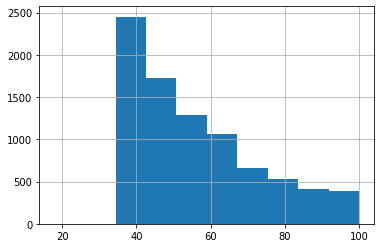

In [4]:
landmark_id_df['landmark_id'].value_counts().hist()

In [5]:
# Occurance of landmark_id in decreasing order(Top categories)
temp = pd.DataFrame(landmark_id_df.landmark_id.value_counts().head(8))
temp.reset_index(inplace=True)
temp.columns = ['landmark_id','count']
temp

landmark_id  count
0       194047    100
1        75036    100
2        69483    100
3        63593    100
4        59833    100
5        53884    100
6        47669    100
7        43409    100

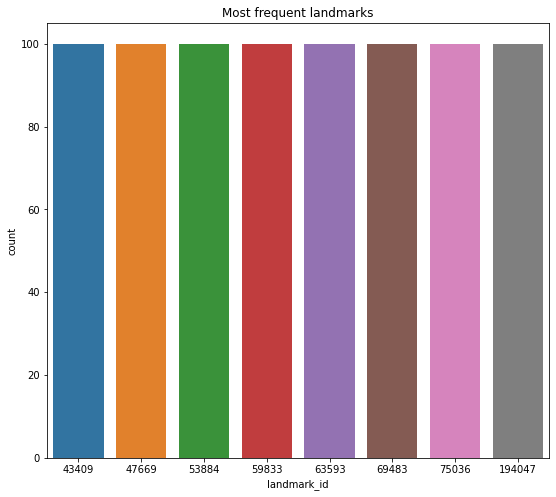

In [6]:
# Plot the most frequent landmark_ids
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (9, 8))
plt.title('Most frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=temp,
            label="Count")
plt.show()

In [7]:
del temp

In [8]:
# Occurance of landmark_id in increasing order
temp = pd.DataFrame(landmark_id_df.landmark_id.value_counts().tail(8))
temp.reset_index(inplace=True)
temp.columns = ['landmark_id','count']
temp

landmark_id  count
0       154314     35
1       154160     35
2       153955     35
3       152918     35
4       152146     35
5       151841     35
6       151836     35
7        71234     18

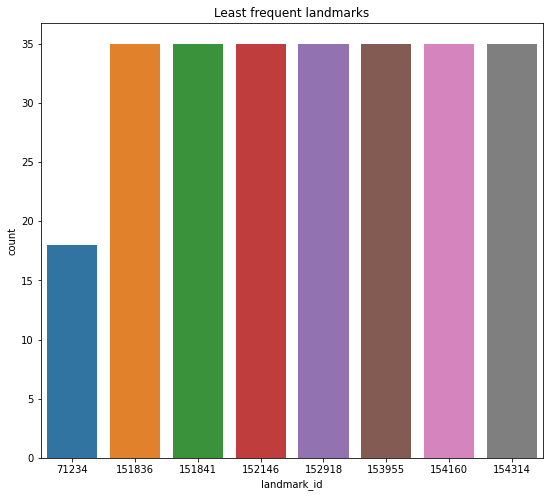

In [9]:
# Plot the least frequent landmark_ids
plt.figure(figsize = (9, 8))
plt.title('Least frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=temp,
            label="Count")
plt.show()

In [10]:
del temp

In [11]:
landmark_id_df.nunique()

filename       474142
landmark_id      8534
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


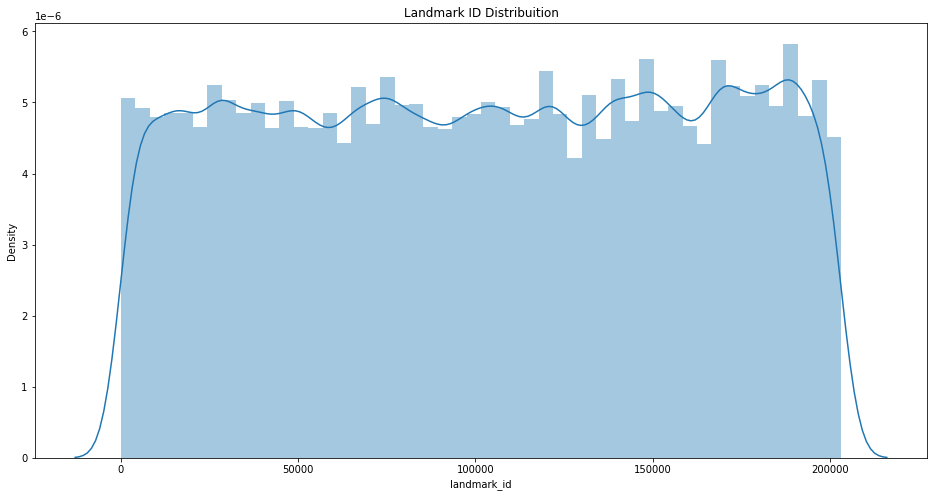

In [12]:
#Landmark ID distribution
plt.figure(figsize = (16, 8))
plt.title('Landmark ID Distribuition')
sns.distplot(landmark_id_df['landmark_id'])

plt.show()

In [13]:
print("Number of classes under 20 occurences",(landmark_id_df['landmark_id'].value_counts() <= 20).sum(),'out of total number of categories',len(landmark_id_df['landmark_id'].unique()))

Number of classes under 20 occurences 1 out of total number of categories 8534


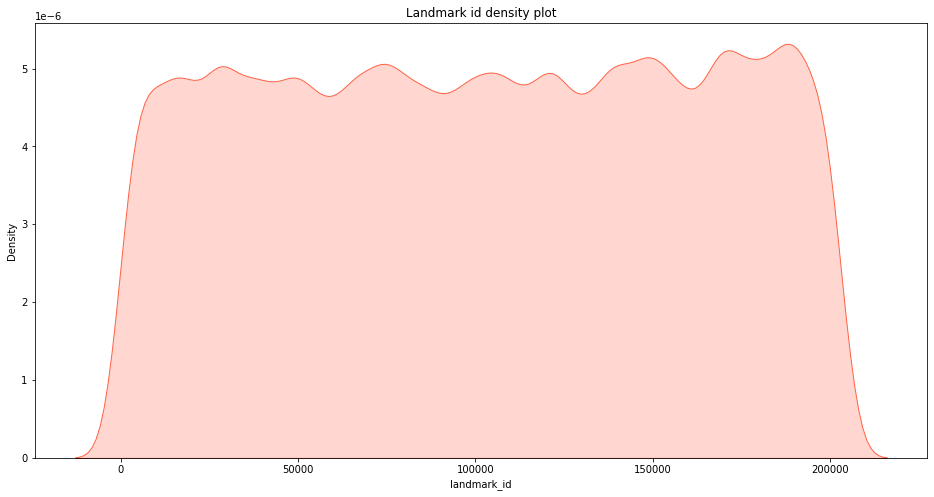

In [14]:
# Landmark Id Density Plot
plt.figure(figsize = (16, 8))
plt.title('Landmark id density plot')
sns.kdeplot(landmark_id_df['landmark_id'], color="tomato", shade=True)
plt.show()

In [15]:
lst = landmark_id_df['landmark_id'].value_counts()
df_1 = lst.to_frame(name = 'freq')
df_1['id'] = list(df_1.index)
df_1 = df_1.reindex(columns = ['id','freq'])
# df_1 = pd.concat([df1, df2], axis=1)
print(df_1)

            id  freq
194047  194047   100
75036    75036   100
69483    69483   100
63593    63593   100
59833    59833   100
...        ...   ...
152918  152918    35
152146  152146    35
151841  151841    35
151836  151836    35
71234    71234    18

[8534 rows x 2 columns]


In [16]:
df_2 = df_1.sort_values(by=['id'])
df_2.reset_index(drop=True, inplace=True)
df_2

id  freq
0         43    44
1        115    46
2        124    40
3        136    82
4        139    50
...      ...   ...
8529  202979    81
8530  202990    42
8531  203007    66
8532  203026    61
8533  203056    36

[8534 rows x 2 columns]

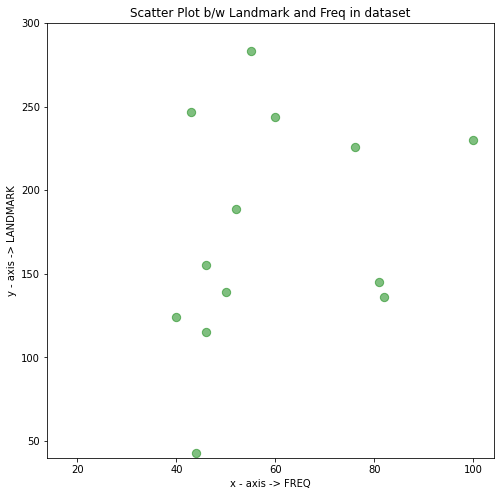

In [17]:
import matplotlib.pyplot as plt
 
# x axis values
x = df_1['freq']

# corresponding y axis values
y = df_1['id']
 
# plotting the points
# plt.plot(x, y, color='green', linestyle='dashed', linewidth = 1,
#          marker='o', markerfacecolor='blue', markersize=2)
plt.figure(figsize=(8, 8))
plt.scatter(x, y, s=70, c='green', alpha=0.5)
 
# setting x and y axis range
plt.ylim(40,300)
# plt.xlim(1,8)
 
# naming the x axis
plt.xlabel('x - axis -> FREQ')
# naming the y axis
plt.ylabel('y - axis -> LANDMARK')
 
# giving a title to my graph
plt.title('Scatter Plot b/w Landmark and Freq in dataset')
 
# function to show the plot
plt.show()

# Data Class Analysis

Top 50 class categories

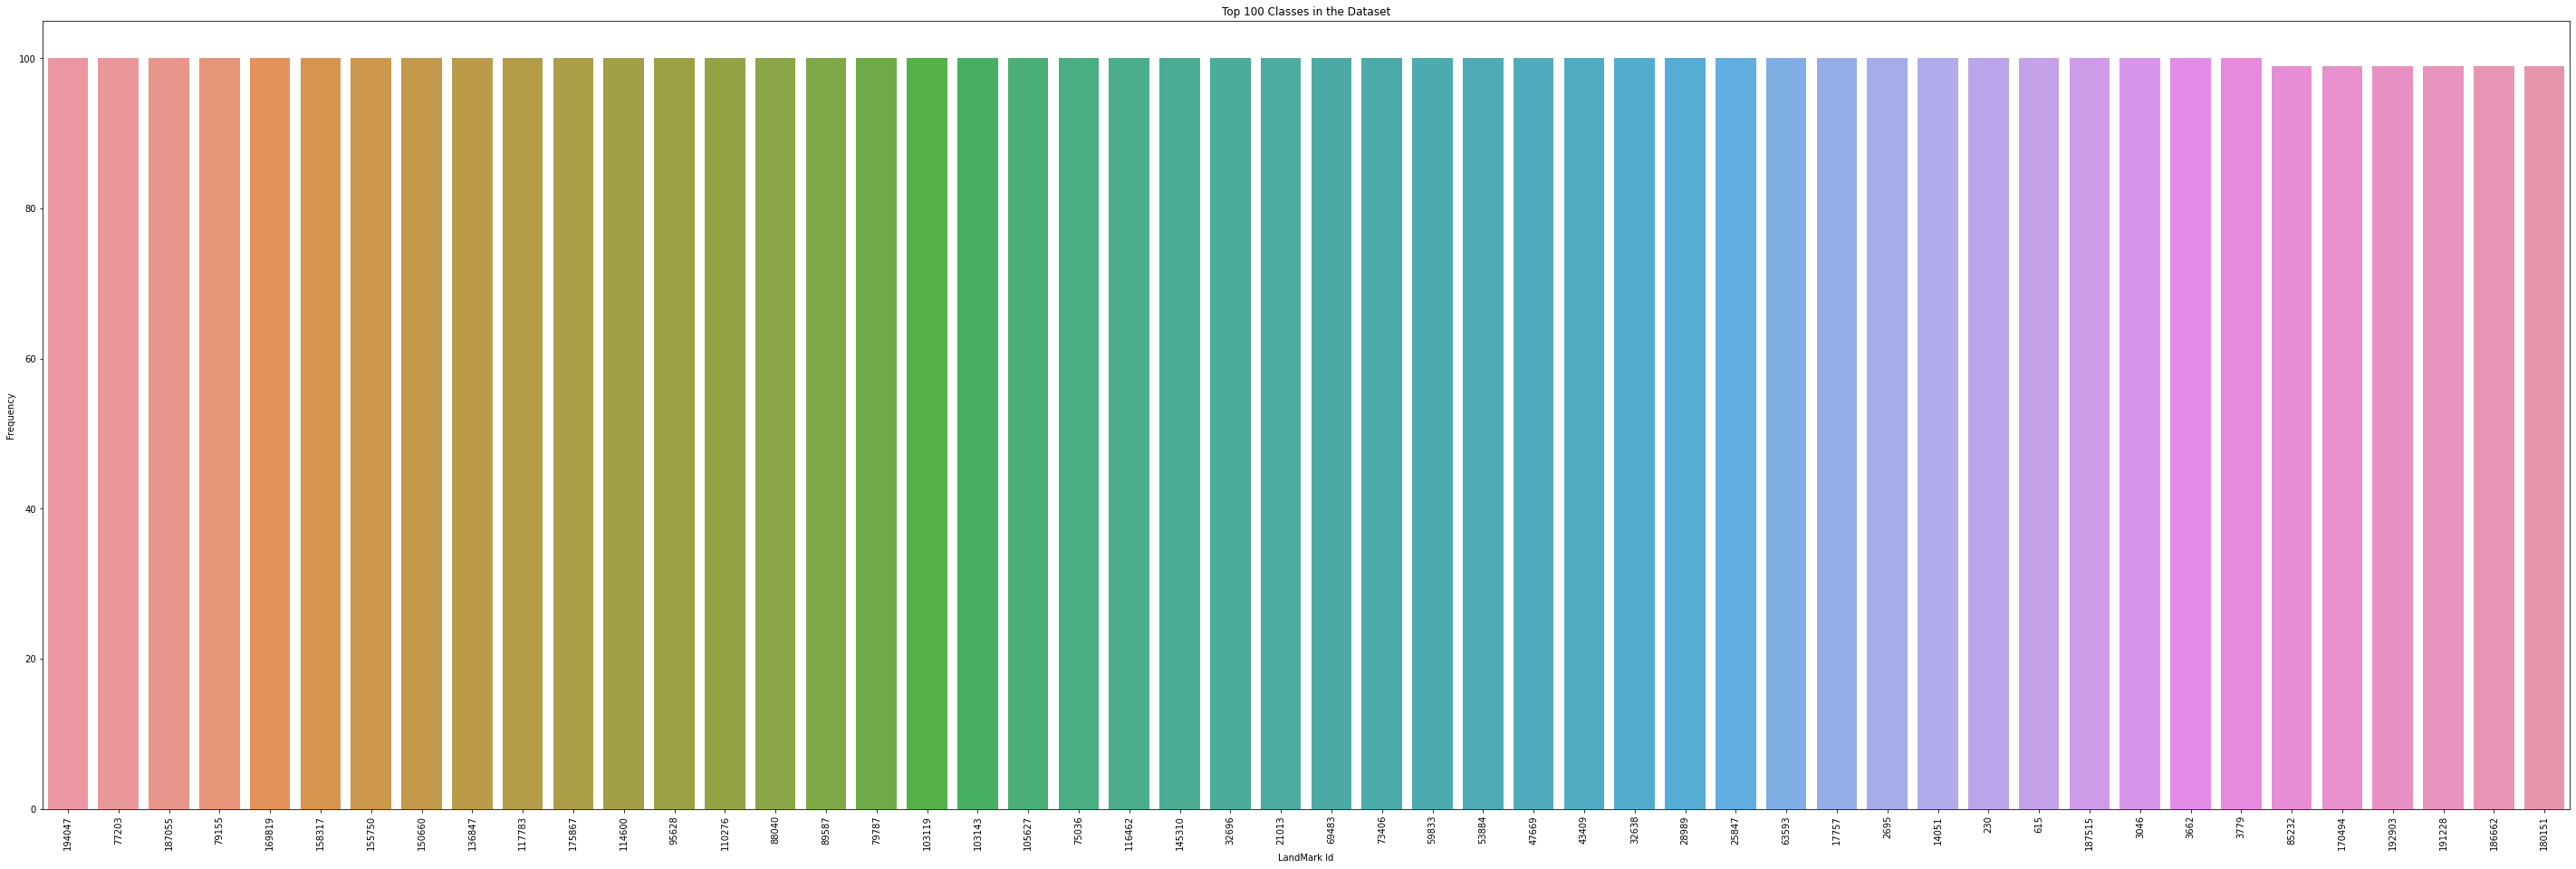

In [18]:
fig = plt.figure(figsize = (50,16))

count = landmark_id_df.landmark_id.value_counts().sort_values(ascending=False)[:50]

sns.countplot(x=landmark_id_df.landmark_id,
             order = landmark_id_df.landmark_id.value_counts().sort_values(ascending=False).iloc[:50].index)

plt.xticks(rotation = 90)

plt.xlabel("LandMark Id")
plt.ylabel("Frequency")
plt.title("Top 100 Classes in the Dataset")

plt.show()

Top 50 classes constitute around 5000 images from the dataset

In [19]:
del df_1

In [20]:
del x
del y

# Down Sampling

In [21]:
# Importing libraries
import os
import cv2
import shutil
import numpy as np
import pandas as pd
from scipy import spatial
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import random

In [22]:
TRAIN_DIR = '../input/google-landmark-dataset-v2-mini/gldv2_mini'
TRAIN_CSV = '../input/google-landmark-dataset-v2-mini/gldv2_mini/gldv2_mini.csv'
train_df = pd.read_csv(TRAIN_CSV)
print(train_df)

TRAIN_PATHS = [os.path.join(TRAIN_DIR, f'{img[0]}/{img[1]}/{img[2]}/{img}.jpg') for img in train_df['filename']]
train_df['path'] = TRAIN_PATHS
print(train_df['path'][0])

train_df

                    filename  landmark_id
0       f82497d5fc4414b4.jpg       194047
1       f54d302bc78558f3.jpg       194047
2       ec71fddef8027e43.jpg       194047
3       ec571b60274d3b53.jpg       194047
4       ea2daf404a271616.jpg       194047
...                      ...          ...
474137  84d673916be6336d.jpg        71234
474138  8269baf06ef3f245.jpg        71234
474139  7dc7f03247365f5d.jpg        71234
474140  6dd765cb2abe862c.jpg        71234
474141  6c747858e4c5e625.jpg        71234

[474142 rows x 2 columns]
../input/google-landmark-dataset-v2-mini/gldv2_mini/f/8/2/f82497d5fc4414b4.jpg.jpg


filename  landmark_id  \
0       f82497d5fc4414b4.jpg       194047   
1       f54d302bc78558f3.jpg       194047   
2       ec71fddef8027e43.jpg       194047   
3       ec571b60274d3b53.jpg       194047   
4       ea2daf404a271616.jpg       194047   
...                      ...          ...   
474137  84d673916be6336d.jpg        71234   
474138  8269baf06ef3f245.jpg        71234   
474139  7dc7f03247365f5d.jpg        71234   
474140  6dd765cb2abe862c.jpg        71234   
474141  6c747858e4c5e625.jpg        71234   

                                                     path  
0       ../input/google-landmark-dataset-v2-mini/gldv2...  
1       ../input/google-landmark-dataset-v2-mini/gldv2...  
2       ../input/google-landmark-dataset-v2-mini/gldv2...  
3       ../input/google-landmark-dataset-v2-mini/gldv2...  
4       ../input/google-landmark-dataset-v2-mini/gldv2...  
...                                                   ...  
474137  ../input/google-landmark-dataset-v2-mini/gldv2...  
474138  ../input/google-landmark-dataset-v2-mini/gldv2...  
474139  ../input/google-landmark-dataset-v2-mini/gldv2...  
474140  ../input/google-landmark-dataset-v2-mini/gldv2...  
474141  ../input/google-landmark-dataset-v2-mini/gldv2...  

[474142 rows x 3 columns]

In [23]:
train_df = train_df.sort_values(by=['landmark_id'])
train_df.head()

filename  landmark_id  \
369229  01d1a2461b033111.jpg           43   
369204  83ec579c40e4fbd5.jpg           43   
369203  9cbd73df7c84a749.jpg           43   
369202  a67ba49c0397e3eb.jpg           43   
369201  a765060fe93a919a.jpg           43   

                                                     path  
369229  ../input/google-landmark-dataset-v2-mini/gldv2...  
369204  ../input/google-landmark-dataset-v2-mini/gldv2...  
369203  ../input/google-landmark-dataset-v2-mini/gldv2...  
369202  ../input/google-landmark-dataset-v2-mini/gldv2...  
369201  ../input/google-landmark-dataset-v2-mini/gldv2...

In [24]:
a = train_df['landmark_id'].unique()
print(a)
print(type(a))
print(len(a))

[    43    115    124 ... 203007 203026 203056]
<class 'numpy.ndarray'>
8534


In [25]:
train_df_sort = train_df.sort_values(by=['landmark_id'])
train_df_sort.reset_index(drop=True, inplace=True)
print(train_df_sort.head(2))
print(len(train_df_sort))

               filename  landmark_id  \
0  01d1a2461b033111.jpg           43   
1  1bcf03a55ff8a935.jpg           43   

                                                path  
0  ../input/google-landmark-dataset-v2-mini/gldv2...  
1  ../input/google-landmark-dataset-v2-mini/gldv2...  
474142


In [26]:
b = train_df_sort['filename']
b

0         01d1a2461b033111.jpg
1         1bcf03a55ff8a935.jpg
2         1d835e20d517b0cb.jpg
3         1d85ae5e5a591ff0.jpg
4         25b1cbf1436de20d.jpg
                  ...         
474137    5d581ad3a4745ca7.jpg
474138    1905fcc99d557930.jpg
474139    0dc91a4e037555ba.jpg
474140    6683b61a9c40e8c0.jpg
474141    f88855d32aef4b84.jpg
Name: filename, Length: 474142, dtype: object

In [27]:
df_2

id  freq
0         43    44
1        115    46
2        124    40
3        136    82
4        139    50
...      ...   ...
8529  202979    81
8530  202990    42
8531  203007    66
8532  203026    61
8533  203056    36

[8534 rows x 2 columns]

In [28]:
# downsample starts for training set, making a dictionary
dict_1={}
old_freq = 0
for iter in range(0,len(a)): #8534
    x1 = pd.to_numeric(df_2['freq']) #freq
    length = x1[iter]
    for i in range(old_freq,old_freq+length):
        value = train_df_sort['path'][i]
        key = df_2['id'][iter]
        if key in dict_1.keys():
            dict_1.get(key).append(value)
        else:
            dict_1[key] = [value]
    old_freq = old_freq + length

In [29]:
print(len(dict_1.get(202990)))

42


In [30]:
minvalue = df_2['freq'].min()
minvalue

18

In [31]:
meanvalue = df_2['freq'].mean()
meanvalue

55.55917506444809

In [32]:
maxvalue = df_2['freq'].max()
maxvalue

100

In [33]:
del minvalue
# del meanvalue
del maxvalue

In [34]:
# #down sample training dataset
# list_images = []
# list_labels=[]
# for i in range(0, len(a)): #8534
#     curr_list = dict_1.get(i)
#     length_mean_or_less = 56 if df_2['freq'][i]>=56 else df_2['freq'][i]
#     for k in range(0,length_mean_or_less):
#         j = random.choice(range(0, df_2['freq'][i]))
# #         img = cv2.imread(dict_1.get(i)[j])
# #         img = cv2.resize(img, (800, 800))
# #         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         list_images.append(dict_1.get(df_2['id'][i])[j])
# #         list_images.append(img)
#         list_labels.append(df_2['id'][i])

# print(len(list_images))
# print(len(list_labels))

In [35]:
# list_images = []
# list_labels= []
# for c in range(0,len(a)) : #8534
# i=alcl
# curr-_list = dict_1.get(i)
# if (df_2['freq'][c]>meanvalue):
# for k in range(0,50) :
# j=random.choice(range(0, len(dict_1.get(i))))
# #print("¡=", i)
# #print("i=",i)
# #print(len(dict_1.get(i)))
# mg = cv2.imread(dict_1.get(i)[j])
# 1g = cv2.resize(img, (224, 224))
# img = cv2. cvtColor (img, cv2.COLOR_BGR2RGB)
# list_images.append (ima)
# list_labels.append(i)

In [36]:
#ids of top 30 classes
count = landmark_id_df.landmark_id.value_counts().sort_values(ascending=False)[:30]
df_3 = count.to_frame(name = "Freq") 
# df_3
type(df_3.index)
list1=df_3.index.tolist()
# print(df_3['landmark_id'])

In [37]:
#down sample training dataset
list_images = []
list_labels=[]
for i in range(0, len(a)): #8534
    curr_list = dict_1.get(i)
    if(df_2['id'][i] in list1):
        length_mean_or_less = 80 if df_2['freq'][i]>=10 else df_2['freq'][i]
        for k in range(0,length_mean_or_less):
            j = random.choice(range(0, df_2['freq'][i]))
    #         img = cv2.imread(dict_1.get(i)[j])
    #         img = cv2.resize(img, (800, 800))
    #         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            list_images.append(cv2.imread(dict_1.get(df_2['id'][i])[j]))
    #         list_images.append(img)
            list_labels.append(df_2['id'][i])

print(len(list_images))
print(len(list_labels))

2400
2400


In [38]:
# del a
# del b
# del train_df
# del train_df_sort
# del df_2

In [39]:
# list_images[40:50]

In [40]:
list_labels[40:50]

[21013, 21013, 21013, 21013, 21013, 21013, 21013, 21013, 21013, 21013]

# Viewing Same Landmark Images
## Landmark ID = 43

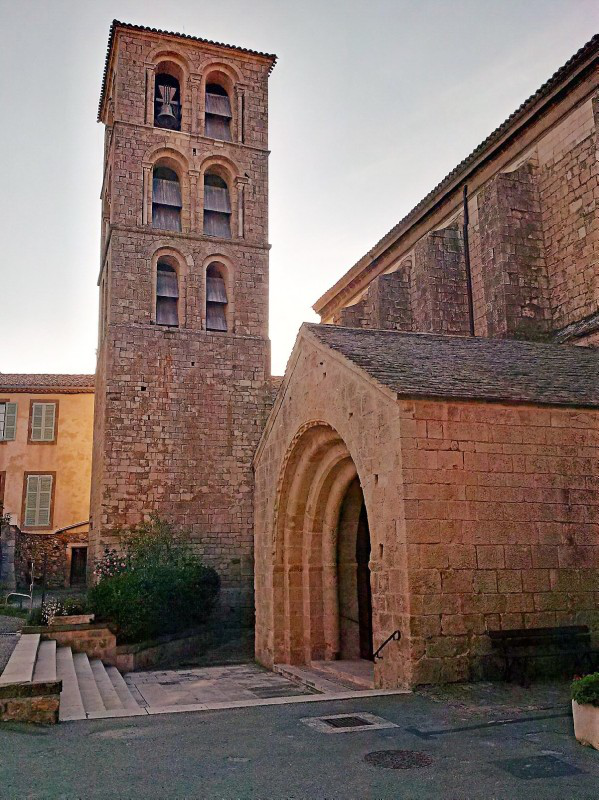

In [41]:
from PIL import Image

img = Image.open("../input/google-landmark-dataset-v2-mini/gldv2_mini/7/f/1/7f1085ebeca1d8a8.jpg.jpg")
img

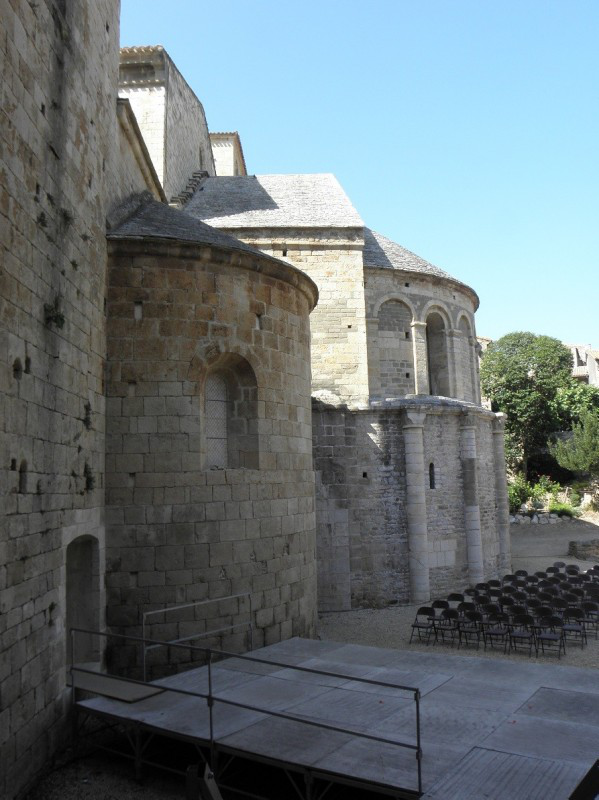

In [42]:
img = Image.open("../input/google-landmark-dataset-v2-mini/gldv2_mini/e/9/0/e90c70a14a453641.jpg.jpg")
img

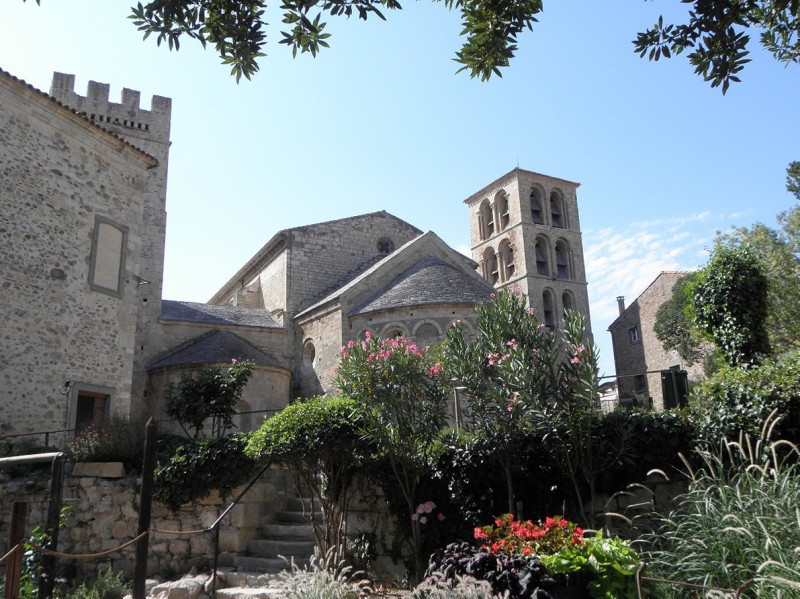

In [43]:
img = Image.open("../input/google-landmark-dataset-v2-mini/gldv2_mini/7/4/5/74510cd36f7703c9.jpg.jpg")
img

# Viewing Same Landmark Images
## Landmark ID = 115

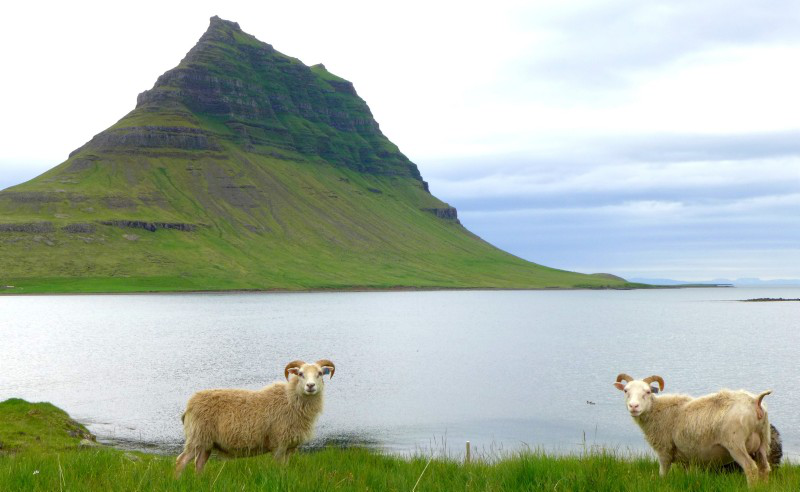

In [44]:
img = Image.open("../input/google-landmark-dataset-v2-mini/gldv2_mini/9/3/f/93fefc4db33b0b47.jpg.jpg")
img

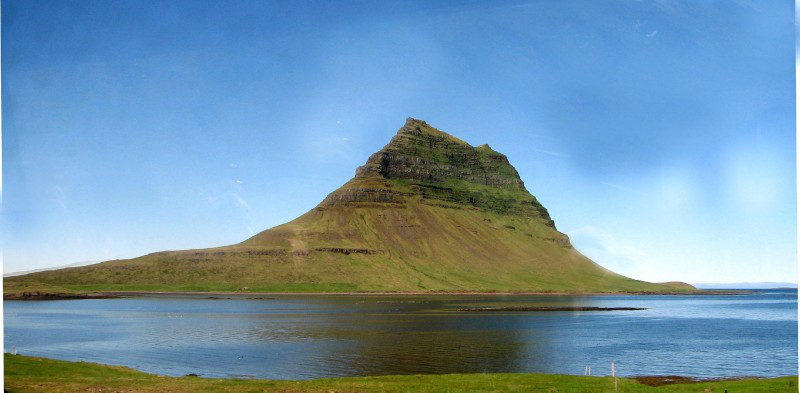

In [45]:
img = Image.open("../input/google-landmark-dataset-v2-mini/gldv2_mini/4/8/7/4871d98dfc997c59.jpg.jpg")
img

In [46]:
del img

# Extracting Images and Resizing to Optimal Size

In [47]:
#list of images
list_of_images = list()
for image_name in train_df['path'][0:1000]:
    img = cv2.imread(image_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    list_of_images.append(img)

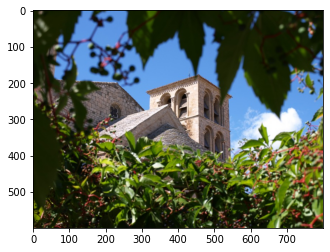

In [48]:
plt.imshow(list_of_images[0])

In [49]:
Height = list()
Width = list()
# Convert it to Dataframe and compute aspect ratio
for img in list_of_images:
    height, width, channels = img.shape
    Height.append(height)
    Width.append(width)

In [50]:
# Make dictionary, keys will become dataframe column names
intermediate_dictionary = {'Width': Width, 'Height':Height}

# Convert dictionary to Pandas dataframe
dataframe_sizing = pd.DataFrame(intermediate_dictionary)

print(dataframe_sizing)

     Width  Height
0      800     600
1      599     800
2      533     800
3      533     800
4      533     800
..     ...     ...
995    800     495
996    800     508
997    800     600
998    800     532
999    800     547

[1000 rows x 2 columns]


In [51]:
dataframe_sizing["Aspect Ratio"] = round(dataframe_sizing["Width"] / dataframe_sizing["Height"], 2)
print(f'Total Nr of Images in the dataset: {len(dataframe_sizing)}')
dataframe_sizing.head()

Total Nr of Images in the dataset: 1000


Width  Height  Aspect Ratio
0    800     600          1.33
1    599     800          0.75
2    533     800          0.67
3    533     800          0.67
4    533     800          0.67

Text(0, 0.5, 'Height')

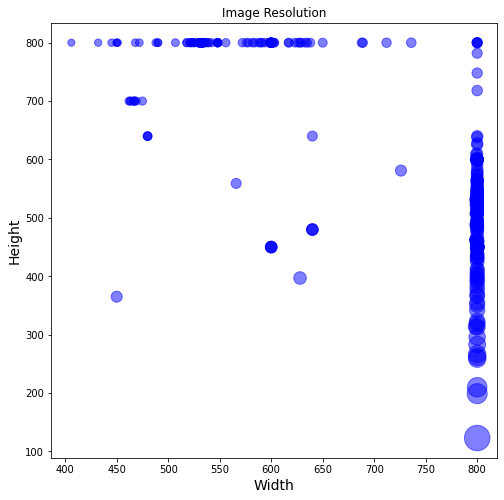

In [52]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(dataframe_sizing.Width, dataframe_sizing.Height, color='blue', alpha=0.5, s=dataframe_sizing["Aspect Ratio"]*100, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)

In [53]:
del list_of_images
del dataframe_sizing

# Updating Dictionary Value Lists of Path with Lists of Image nparray

In [54]:
new_dict = {}

# ⚠️ script fails from here

In [55]:
for j in range(0, len(list_images)):
#   img = cv2.imread(list_images[i])
    img = cv2.resize(img, (200, 200))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    list_images[j]=img   

RuntimeError: dictionary changed size during iteration

In [56]:
# # traversing dictionary function
# for i in dict_1:
#     for j in range(0, len(dict_1[i])):
#         img = cv2.imread(dict_1.get(i)[j])
#         img = cv2.resize(img, (800, 800))
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         if i in new_dict.keys():
#             new_dict.get(i).append(img)
#         else:
#             new_dict[i] = [img]
#     del dict_1[i]

NPARRAY ERROR

In [57]:
#traversing dictionary function
for j in range(0, len(list_images)):
#   img = cv2.imread(list_images[i])
    img = cv2.resize(img, (32, 32))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    list_images[j]=img

In [58]:
print(len(list_images))
print(len(list_labels))

2400
2400


In [59]:
list_images[0].shape

(32, 32, 3)

In [60]:
x=list_images
print(x[0].shape)
y=list_labels
for i in range(0,len(x)):
    x[i] = x[i].astype('float32') / 255.0 - 0.5

print(x[0].shape)

(32, 32, 3)
(32, 32, 3)


In [61]:
x=np.array(x)
y=np.array(y)

In [62]:
type(x)

numpy.ndarray

In [63]:
# # Subsetting
# train_df_grouped = pd.DataFrame(train_df.landmark_id.value_counts())
# train_df_grouped.reset_index(inplace=True)
# train_df_grouped.columns = ['landmark_id','count']

# # Selected landmarks based on inclass frequency
# selected_landmarks = train_df_grouped[(train_df_grouped['count'] <= 155) & (train_df_grouped['count'] >= 150)]

# train_df_sub = train_df[train_df['landmark_id'].isin(selected_landmarks['landmark_id'])]
# new_id = []
# current_id = 0
# previous_id = int(train_df_sub.head(1)['landmark_id'])
# for landmark_id in train_df_sub['landmark_id']:
#     if landmark_id == previous_id:
#         new_id.append(current_id)
#     else:
#         current_id += 1
#         new_id.append(current_id)
#         previous_id = landmark_id

# train_df_sub['new_id'] = new_id

# NUM_CLASSES = train_df_sub['landmark_id'].nunique()

# print(f"Unique classes found: {NUM_CLASSES}")
# train_df_sub

In [64]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
X_train, X_test = train_test_split(x, test_size=0.1, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.1, random_state=42)

In [66]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [67]:
h=32
w=32
c=3

In [68]:
import tensorflow as tf
from tensorflow.keras.models import save_model
#from tensorflow.python.framework import ops
import tensorflow.keras.layers as L
#import tensorflow.compat.v1.keras.backend as K
import numpy as np
from sklearn.model_selection import train_test_split
#from lfw_dataset import load_lfw_dataset
import matplotlib.pyplot as plt
#import keras_utils
import numpy as np

In [69]:
img = h,w,c

In [70]:
encoder = tf.keras.models.Sequential()
encoder.add(L.InputLayer(img))
encoder.add(L.Conv2D(filters=32, kernel_size=(3, 3), activation='elu', padding='same'))
encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
encoder.add(L.Conv2D(filters=64, kernel_size=(3, 3), activation='elu', padding='same'))
encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
encoder.add(L.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', padding='same'))
encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
encoder.add(L.Conv2D(filters=256, kernel_size=(3, 3), activation='elu', padding='same'))
encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
encoder.add(L.Flatten())
encoder.add(L.Dense(1))

2022-04-21 17:38:31.630249: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [71]:
decoder = tf.keras.models.Sequential()
decoder.add(L.InputLayer((1,)))
    
### YOUR CODE HERE: define decoder as per instructions above ###
decoder.add(L.Dense(2*2*256))
decoder.add(L.Reshape((2, 2, 256)))
decoder.add(L.Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
decoder.add(L.Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
decoder.add(L.Conv2DTranspose(filters=32, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
decoder.add(L.Conv2DTranspose(filters=3, kernel_size=(3, 3), strides=2, activation=None, padding='same'))

In [72]:
encoder.summary()
decoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 256)         2

In [73]:
inp = L.Input(img)
code = encoder(inp)
reconstruction = decoder(code)

In [74]:
autoencoder = tf.keras.models.Model(inputs=inp, outputs=reconstruction)
autoencoder.compile(optimizer="adamax", loss='mse')

In [75]:
# we will save model checkpoints here to continue training in case of kernel death
model_filename = 'autoencoder.{0:03d}.hdf5'
last_finished_epoch = None

#### uncomment below to continue training from model checkpoint
#### fill `last_finished_epoch` with your latest finished epoch
# from keras.models import load_model
# s = reset_tf_session()
# last_finished_epoch = 4
# autoencoder = load_model(model_filename.format(last_finished_epoch))
# encoder = autoencoder.layers[1]
# decoder = autoencoder.layers[2]

In [76]:
class ModelSaveCallback(tf.keras.callbacks.Callback):
    def __init__(self, file_name):
        super(ModelSaveCallback, self).__init__()
        self.file_name = file_name

    def on_epoch_end(self, epoch, logs=None):
        model_filename = self.file_name.format(epoch)
        save_model(self.model, model_filename)
        print("Model saved in {}".format(model_filename))

In [77]:

#for i in range(0,len(X_train)):
   # X_train[i]=np.reshape(X_train[i],(300,400,3))
    
#for i in range(0,len(X_test)):
    #X_test[i]=np.reshape(X_test[i],(300,400,3))
    



In [78]:
X_train.shape

(2160, 32, 32, 3)

In [79]:
his=autoencoder.fit(X_train,X_train,  batch_size=10 , epochs=10,validation_data=(X_test, X_test))

2022-04-21 17:38:35.986815: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
216/216 [==============================] - 8s 31ms/step - loss: 0.0071 - val_loss: 0.0032
Epoch 2/10
216/216 [==============================] - 6s 29ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 3/10
216/216 [==============================] - 6s 30ms/step - loss: 0.0025 - val_loss: 9.7517e-04
Epoch 4/10
216/216 [==============================] - 7s 33ms/step - loss: 4.7197e-04 - val_loss: 2.3005e-04
Epoch 5/10
216/216 [==============================] - 6s 30ms/step - loss: 1.4684e-04 - val_loss: 1.0880e-04
Epoch 6/10
216/216 [==============================] - 6s 30ms/step - loss: 8.3918e-05 - val_loss: 5.1781e-05
Epoch 7/10
216/216 [==============================] - 6s 29ms/step - loss: 4.0251e-05 - val_loss: 3.2362e-05
Epoch 8/10
216/216 [==============================] - 7s 33ms/step - loss: 2.6232e-05 - val_loss: 3.1926e-05
Epoch 9/10
216/216 [==============================] - 6s 30ms/step - loss: 2.0215e-05 - val_loss: 9.7370e-06
Epoch 10/10
216/216 [==================

In [80]:
images = X_train
codes = encoder.predict(images) 
assert len(codes) == len(images)

In [81]:
from sklearn.neighbors import NearestNeighbors

In [82]:
#from sklearn.neighbors.unsupervised import NearestNeighbors
nei_clf = NearestNeighbors(metric="euclidean")
nei_clf.fit(codes)

NearestNeighbors(metric='euclidean')

In [83]:
def get_similar(image, n_neighbors=5):
    assert image.ndim==3,"image must be [batch,height,width,3]"

    code = encoder.predict(image[None])
    
    (distances,),(idx,) = nei_clf.kneighbors(code,n_neighbors=n_neighbors)
    
    return distances,images[idx]

In [84]:
def show_similar(image):
    
    distances,neighbors = get_similar(image,n_neighbors=3)
    
    plt.figure(figsize=[8,7])
    plt.subplot(1,4,1)
    plt.imshow(np.clip(image + 0.5, 0, 1))
    plt.title("Original image")
    
    for i in range(3):
        plt.subplot(1,4,i+2)
        plt.imshow(np.clip(neighbors[i] + 0.5, 0, 1))
        plt.title("Dist=%.3f"%distances[i])
    plt.show()

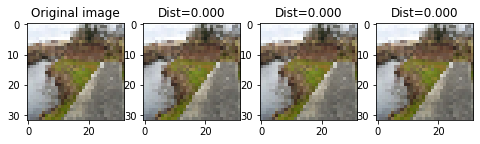

In [85]:
show_similar(X_test[0])